In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sn
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

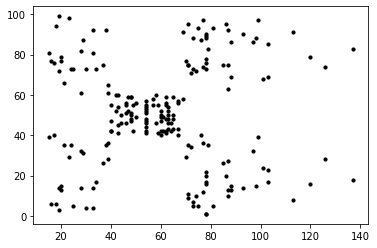

In [3]:
pt.scatter(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],s=10,color='black')

In [5]:
x=df.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

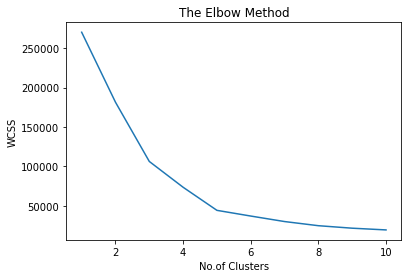

In [6]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

pt.plot(range(1,11),wcss)
pt.title('The Elbow Method')
pt.xlabel('No.of Clusters')
pt.ylabel('WCSS')
pt.show()

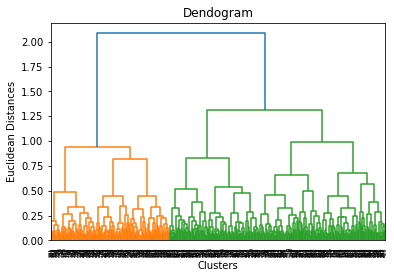

In [32]:
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(x,method='ward'))
pt.title('Dendogram')
pt.xlabel('Clusters')
pt.ylabel('Euclidean Distances')
pt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering
hac=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hac=hac.fit_predict(x)
y_hac

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [10]:
np.unique(y_hac)

array([0, 1, 2, 3, 4], dtype=int64)

In [12]:
lb=hac.labels_
lb

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

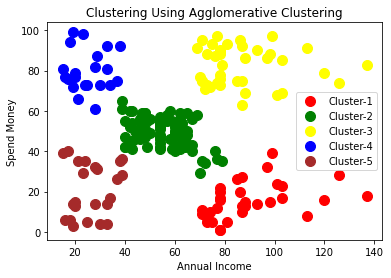

In [15]:
pt.scatter(x[lb==0,0],x[lb==0,1],s=100,c='red',label='Cluster-1')
pt.scatter(x[lb==1,0],x[lb==1,1],s=100,c='Green',label='Cluster-2')
pt.scatter(x[lb==2,0],x[lb==2,1],s=100,c='yellow',label='Cluster-3')
pt.scatter(x[lb==3,0],x[lb==3,1],s=100,c='blue',label='Cluster-4')
pt.scatter(x[lb==4,0],x[lb==4,1],s=100,c='brown',label='Cluster-5')
pt.title('Clustering Using Agglomerative Clustering')
pt.xlabel('Annual Income')
pt.ylabel('Spend Money')
pt.legend()
pt.show()

In [16]:
# 1.silhouette_score
from sklearn import metrics
silhouette_avg=metrics.silhouette_score(x,lb)
silhouette_avg

0.5529945955148897

In [17]:
# 2.Davies-Bould Index (DBI)
from sklearn import metrics
metrics.davies_bouldin_score(x,lb)

0.5782207452369452

In [18]:
# 3.Calinski-Harabasz index
from sklearn import metrics
metrics.calinski_harabasz_score(x,lb)

243.07142892964563

In [56]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
df=datasets.load_iris()
df

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [57]:
X=pd.DataFrame(data=df.data,columns=df.feature_names)
y=pd.Series(data=df.target)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [58]:
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

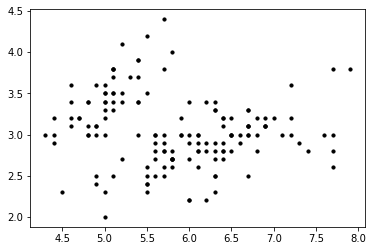

In [59]:
pt.scatter(x=X['sepal length (cm)'],y=X['sepal width (cm)'],s=10,color='black')

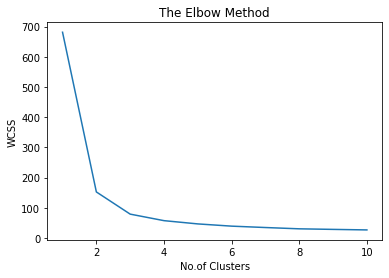

In [60]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

pt.plot(range(1,11),wcss)
pt.title('The Elbow Method')
pt.xlabel('No.of Clusters')
pt.ylabel('WCSS')
pt.show()

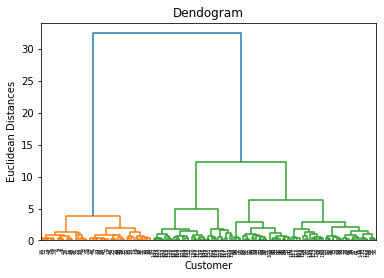

In [61]:
import scipy.cluster.hierarchy as sch
dendogram=sch.dendrogram(sch.linkage(X,method='ward'))
pt.title('Dendogram')
pt.xlabel('Customer')
pt.ylabel('Euclidean Distances')
pt.show()

In [62]:
from sklearn.cluster import AgglomerativeClustering
hac=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hac=hac.fit_predict(X)
y_hac

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [68]:
lables=hac.labels_
lables

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [69]:
np.unique(lb)

array([0, 1, 2], dtype=int64)

In [70]:
np.unique(y_hac)

array([0, 1, 2], dtype=int64)

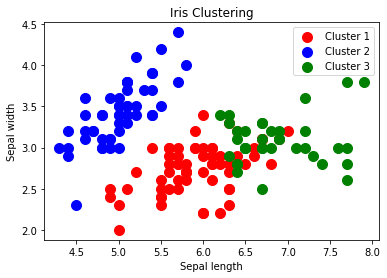

In [76]:
# Create scatter plot
pt.scatter(X[y_hac == 0, 0], X[y_hac == 0, 1], s=100, c='red', label='Cluster 1')
pt.scatter(X[y_hac == 1, 0], X[y_hac == 1, 1], s=100, c='blue', label='Cluster 2')
pt.scatter(X[y_hac == 2, 0], X[y_hac == 2, 1], s=100, c='green', label='Cluster 3')
pt.xlabel('Sepal length')
pt.ylabel('Sepal width')
pt.title('Iris Clustering')
pt.legend()
pt.show()


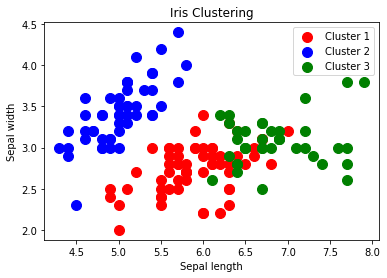

In [75]:
# Create scatter plot
pt.scatter(X[labels == 0, 0], X[labels == 0, 1], s=100, c='red', label='Cluster 1')
pt.scatter(X[labels == 1, 0], X[labels == 1, 1], s=100, c='blue', label='Cluster 2')
pt.scatter(X[labels == 2, 0], X[labels == 2, 1], s=100, c='green', label='Cluster 3')
pt.xlabel('Sepal length')
pt.ylabel('Sepal width')
pt.title('Iris Clustering')
pt.legend()
pt.show()


In [77]:
# 1.silhouette_score
from sklearn import metrics
silhouette_avg=metrics.silhouette_score(x,labels)
silhouette_avg

0.5528190123564095

In [78]:
# 2.Davies-Bould Index (DBI)
from sklearn import metrics
metrics.davies_bouldin_score(x,labels)

0.6619715465007484

In [79]:
# 3.Calinski-Harabasz index
from sklearn import metrics
metrics.calinski_harabasz_score(x,labels)

561.62775662962

In [80]:
# 4.Rand Index
from sklearn.metrics.cluster import rand_score
rand_score(y,labels)

0.8797315436241611

In [81]:
# 5.Fowlkes Mallows Score
from sklearn.metrics.cluster import fowlkes_mallows_score
fowlkes_mallows_score(y,labels)

0.8208080729114153

In [82]:
# 6.Adjusted Index
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(y,labels)

0.7302382722834697

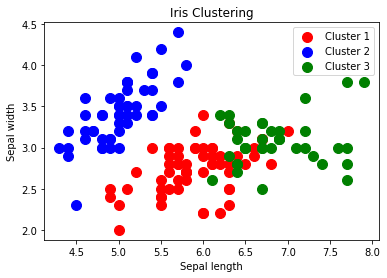

In [73]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load iris dataset
iris = load_iris()

# Extract features
X = iris.data

# Cluster using KMeans algorithm
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_

# Create scatter plot
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load iris dataset
iris = load_iris()

# Extract features
X = iris.data

# Cluster using KMeans algorithm
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_

# Create scatter plot
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s=100, c='green', label='Cluster 3')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris Clustering')
plt.legend()
plt.show()
